In [69]:
import numpy as np # 
import pandas as pd # 

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/Users/zennureozbekacar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


In [70]:
# load data

df = pd.read_json('resources/News_Category_Dataset_v2.json', lines=True)
df.head()
# df = pd.read_json('daily_news_data/JSON/top_headline_business_data.json', lines=True)
# df.head()

,category,headline,authors,link,short_description,date
0,CRIME,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89,She left her husband. He killed their children. Just another day in America.,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,Andy McDonald,https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-world-cup-song_us_5b09726fe4b0fdb2aa541201,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-grant-marries_us_5b09212ce4b0568a880b9a8c,The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carrey-adam-schiff-democrats_us_5b0950e8e4b0fdb2aa53e675,The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-margulies-trump-poop-bag_us_5b093ec2e4b0fdb2aa53df70,"The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment.""",2018-05-26


In [71]:
df['category'].value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL            9887 
STYLE & BEAUTY    9649 
PARENTING         8677 
HEALTHY LIVING    6694 
QUEER VOICES      6314 
FOOD & DRINK      6226 
BUSINESS          5937 
COMEDY            5175 
SPORTS            4884 
BLACK VOICES      4528 
HOME & LIVING     4195 
PARENTS           3955 
THE WORLDPOST     3664 
WEDDINGS          3651 
WOMEN             3490 
IMPACT            3459 
DIVORCE           3426 
CRIME             3405 
MEDIA             2815 
WEIRD NEWS        2670 
GREEN             2622 
WORLDPOST         2579 
RELIGION          2556 
STYLE             2254 
SCIENCE           2178 
WORLD NEWS        2177 
TASTE             2096 
TECH              2082 
MONEY             1707 
ARTS              1509 
FIFTY             1401 
GOOD NEWS         1398 
ARTS & CULTURE    1339 
ENVIRONMENT       1323 
COLLEGE           1144 
LATINO VOICES     1129 
CULTURE & ARTS    1030 
EDUCATION         1004 
Name: category, 

News API categories
* business
* entertainment
* general
* health
* science
* sports
* technology

In [72]:
business =['BUSINESS','MONEY']
entertainment=['ENTERTAINMENT','ARTS','COMEDY','ARTS & CULTURE','CULTURE & ARTS','MEDIA']
health=['HEALTH','WELLNESS','HEALTHY LIVING']
science=['SCIENCE']
sports=['SPORTS']
technology = ['tech']

In [73]:
condition = df['category'].isin(business)
businessDF = df[condition]
businessDF.shape

(7644, 6)

In [142]:
businessDF["short_description"][:50].to_csv("Resources/businessTrain_1.csv")
businessDF["short_description"][:100].to_csv("Resources/businessTest_1.csv")

In [18]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [83]:
f = open('Resources/businessTrain_1.csv', 'r', encoding='utf8')
text = f.read()
t_list = text.split('\n')

corpus = []

for sentence in t_list:
    corpus.append(sentence.split())

In [88]:
print(corpus[:10])

[[',short_description'], ['87,The', 'investigation', 'could', 'lead', 'to', 'new', 'U.S.', 'tariffs', 'similar', 'to', 'those', 'imposed', 'on', 'imported', 'steel', 'and', 'aluminum', 'in', 'March.'], ['337,The', 'new', 'policy', 'was', 'unveiled', 'weeks', 'after', 'the', 'controversial', 'arrest', 'of', 'two', 'black', 'men', 'at', 'a', 'Philadelphia', 'Starbucks.'], ['603,"Following', 'the', 'council', 'vote,', 'Amazon’s', 'vice', 'president,', 'Drew', 'Herdener,', 'said', 'the', 'company', 'has', 'resumed', 'construction', 'planning', 'for', 'its', 'so-called', 'Block', '18', 'project', 'in', 'downtown', 'Seattle."'], ['604,Victims', 'will', 'be', 'free', 'to', 'go', 'to', 'court', '--', 'but', 'a', 'few', 'caveats', 'remain.'], ['669,The', 'breach', 'is', 'believed', 'to', 'have', 'occurred', 'between', 'March', 'and', 'April.'], ['711,"Just', 'by', 'using', 'the', 'app,', 'you', 'click', 'away', 'your', 'rights.', 'Now', 'some', 'victims', 'are', 'fighting', 'for', 'change."'], 

Word2Vec' object has no attribute 'polarity_scores

In [133]:
model = Word2Vec(corpus, size=100, min_count=1,sg=1)

In [134]:
model.wv['app', 'council']

array([[ 4.9366970e-03,  2.5854008e-03,  4.3603820e-03, -5.1422101e-03,
         4.9572634e-03, -4.8993649e-03, -3.7491985e-03,  3.6157350e-04,
        -4.4247545e-03, -1.9946604e-04, -4.2537255e-03, -1.2257796e-03,
        -3.0404038e-03, -2.5055907e-04,  5.1430054e-04, -4.0960461e-03,
        -2.1266169e-03,  4.2998740e-03,  1.5072712e-03,  4.3834005e-03,
         2.2442569e-03, -7.8261318e-04,  5.0035962e-03,  3.4968311e-03,
         4.0908796e-03, -2.8890909e-03, -2.7996311e-03, -1.3627452e-04,
         4.0728929e-03, -4.0576034e-03,  1.0921330e-03,  3.1198056e-03,
         3.8421983e-03,  1.9056558e-03,  1.9603907e-03, -4.3310253e-03,
         1.8535616e-03, -4.8735146e-03,  4.0289527e-03, -2.8158864e-03,
        -1.0839475e-03,  1.2271045e-03,  4.2951996e-03, -3.7024822e-03,
         3.3342044e-03,  3.1781965e-03,  5.0208513e-03,  4.6067224e-03,
        -1.4899471e-03, -5.3153322e-03, -2.8394090e-03, -2.9706107e-03,
         4.7333725e-03,  4.1687177e-03, -4.9476200e-03,  3.24564

In [117]:
model.wv.most_similar('council')

[('Arizona', 0.34767913818359375),
 ('approved', 0.2751935124397278),
 ('members', 0.26255109906196594),
 ('said."', 0.25308239459991455),
 ('David', 0.24499894678592682),
 ('regulators', 0.2425909787416458),
 ('over', 0.23303508758544922),
 ('address', 0.22262318432331085),
 ('worked', 0.2199457734823227),
 ('4514,The', 0.21717362105846405)]

In [146]:
model.wv.most_similar('app')

[('say', 0.278034508228302),
 ('grill', 0.25832563638687134),
 ('agreements.', 0.25241920351982117),
 ('defrauding', 0.2477051466703415),
 ('1295,Verizon', 0.22938579320907593),
 ('2147,"Two', 0.2204972505569458),
 ('pay', 0.215559720993042),
 ('also', 0.20491160452365875),
 ('ago,', 0.20399942994117737),
 ('Hook', 0.2034602165222168)]

In [118]:
model.save('word2vec.model')

In [119]:
model = Word2Vec.load('word2vec.model')

In [120]:
def closestwords_tsneplot(model, word):
    word_vectors = np.empty((0,100))
    word_labels = [word]
    
    close_words = model.wv.most_similar(word)
    
    word_vectors = np.append(word_vectors, np.array([model.wv[word]]), axis=0)
    
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors = np.append(word_vectors, np.array([model.wv[w]]), axis=0)
        
    tsne = TSNE(random_state=0)
    Y = tsne.fit_transform(word_vectors)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(5, -2), textcoords='offset points')
        
    plt.show()

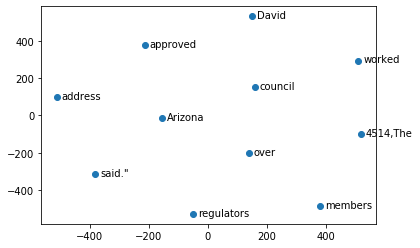

In [122]:
closestwords_tsneplot(model, 'council')

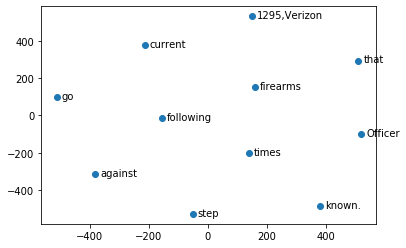

In [128]:
closestwords_tsneplot(model, 'firearms')

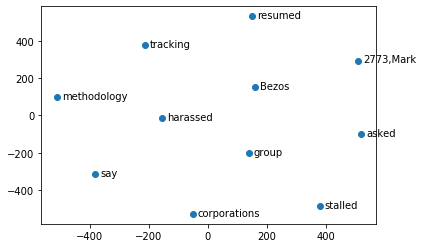

In [136]:
closestwords_tsneplot(model, 'Bezos')

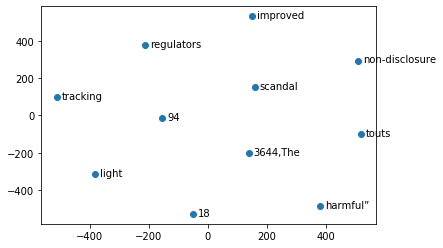

In [138]:
closestwords_tsneplot(model, 'scandal')